In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from __future__ import division
from math import *
from scipy.optimize import fmin_bfgs
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("ex2data1.txt",header=None)
df.columns = ['first','second','result']
df.head()

,first,second,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
#inserting ones column to data
m = df.shape[0]
df.insert(0,'3',np.ones(m))

In [4]:
#renaming columns name
df.columns = np.arange(0,4)
df.columns = ['first','second','third','result']
df.head()

,first,second,third,result
0,1.0,34.623660,78.024693,0
1,1.0,30.286711,43.894998,0
2,1.0,35.847409,72.902198,0
3,1.0,60.182599,86.308552,1
4,1.0,79.032736,75.344376,1


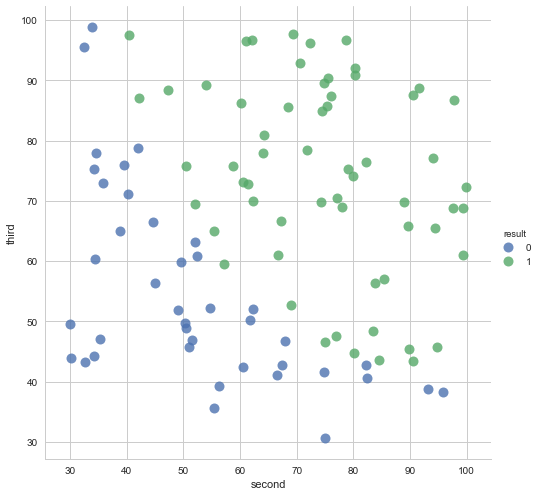

In [5]:
sns.lmplot(x='second',y='third',data=df,fit_reg=False,hue='result',size=7, scatter_kws={"s": 100})

In [6]:
#some of initializations
iterations = 400
theta = pd.Series([0,0,0])
X = df[['first','second','third']]
y = df['result']
last_j = pd.Series(np.ones(m))
alpha = 0.0012

In [7]:
#functions Sections
def sigmoid(x):
    return ( 1 / ( 1 + e ** ( -1 * x)))

def cost_function(theta,X,y):
    J = 0
    
    # finding hypothesis
    h = pd.Series(np.dot( theta.T, X.T ).T)
    
    # Computing Log(sigmoid(x)) for all of the hypotesis elements
    h1 = sigmoid(h).apply(log)
    
    # Computing Log( 1 - simgoid(x)) for all of the hypotesis elements
    h2 = (1.0000000001 - sigmoid(h)).apply(log)
    
    #Computing Cost of the hypotesis
    J =  ( -1 / m ) * ( y.T.dot(h1) + ( 1 - y ).T.dot(h2))
    
    return J

def gradient_function(theta, X, y):
    # finding hypotesis matrix
    h = pd.Series(np.dot( theta.T, X.T ).T)
    h = sigmoid(h)

    # Computing the Gradient Of the Hypotesis
    grad = ( 1 / m ) * ( ( h - y ).T.dot(X).T )
    
    # reindexing to [0, 1, 2]
    grad.index = [0, 1, 2]
    
    return grad

def gradient_algo(theta, X, y):
    for n in range(iterations):
        
        # finding gradient of each element
        grad = gradient_function(theta, X, y)

        # decreasing theta
        theta = theta - alpha * ( grad )
        
        #saving all of the costs
        global last_j
        last_j[n] = cost_function(theta, X, y)
        
    return theta

### Don't Using Optimized Function

In [9]:
iterations = 1000
alpha = 0.001
theta1 = gradient_algo(theta, X, y)
cost_function(theta1, X, y)

0.62498575879980889

### Using Optimized Function

In [10]:
xopt = fmin_bfgs(cost_function , theta, gradient_function, args=(X,y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 20
         Function evaluations: 27
         Gradient evaluations: 27


### Plotting

In [489]:
plot_x = pd.Series([min(X['second']) -2, max(X['third']) + 2])
plot_y = ( -1 / xopt[2] ) * ( xopt[1] * plot_x + xopt[0] )

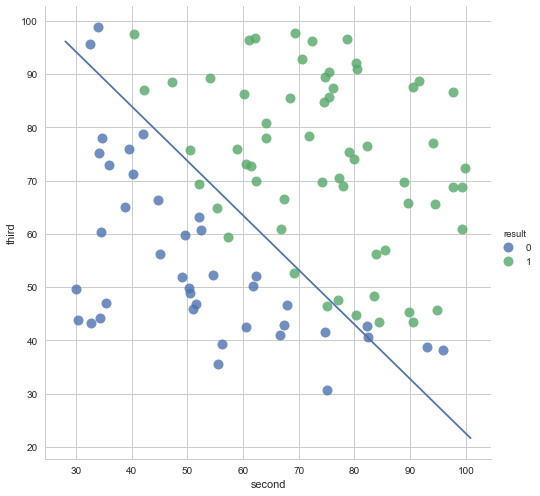

In [490]:
sns.lmplot(x='second',y='third',data=df,fit_reg=False,hue='result',size=7, scatter_kws={"s": 100})
plt.plot(plot_x,plot_y)